In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
# import pandas_datareader as data

In [3]:
import yfinance as yf

start = '2010-01-01'
end = '2019-12-31'

stock_data = yf.download('AAPL',start, end)
(stock_data.head())

/Users/sadafrizwan/Desktop/stock-prediction/stock/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.470739,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.481928,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.378826,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.367031,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.409362,447610800


In [4]:
stock_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-23,70.132500,71.062500,70.092499,71.000000,69.082336,98572000
2019-12-24,71.172501,71.222504,70.730003,71.067497,69.147995,48478800
2019-12-26,71.205002,72.495003,71.175003,72.477501,70.519936,93121200
2019-12-27,72.779999,73.492500,72.029999,72.449997,70.493156,146266000
2019-12-30,72.364998,73.172501,71.305000,72.879997,70.911552,144114400


In [5]:
stock_data = stock_data.reset_index()
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.470739,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.481928,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.378826,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.367031,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.409362,447610800


In [6]:
stock_data = stock_data.drop(['Date', 'Adj Close'], axis = 1)
stock_data.head()
                    

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


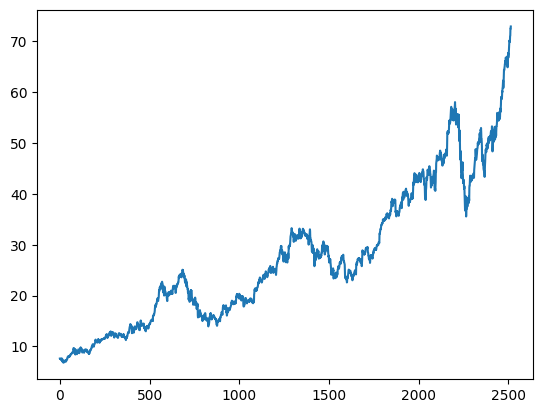

In [7]:
plt.plot(stock_data.Close)

In [8]:
# rolling function

ma100 = stock_data.Close.rolling(100).mean()
ma100 

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    59.201075
2511    59.401700
2512    59.643125
2513    59.875125
2514    60.106325
Name: Close, Length: 2515, dtype: float64

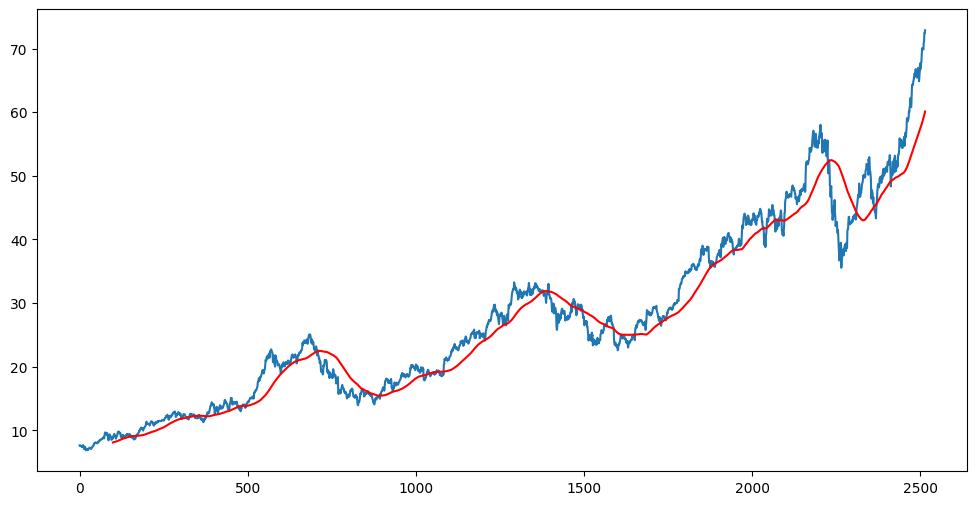

In [9]:
plt.figure(figsize = (12, 6))
plt.plot(stock_data.Close)
plt.plot(ma100, 'r')

In [10]:
ma200 = stock_data.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    54.132313
2511    54.261513
2512    54.396763
2513    54.529350
2514    54.661100
Name: Close, Length: 2515, dtype: float64

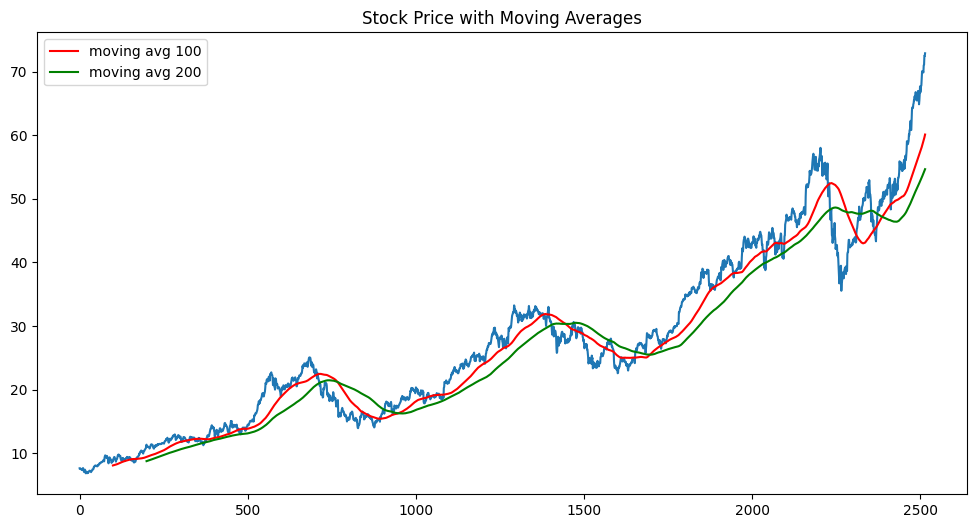

In [11]:
plt.figure(figsize = (12, 6))
plt.plot(stock_data.Close)
plt.plot(ma100, 'r', label='moving avg 100')
plt.plot(ma200, 'g', label='moving avg 200')

plt.title('Stock Price with Moving Averages')

plt.legend()
plt.show()

In [12]:
stock_data.shape

(2515, 5)

In [13]:
#  splitting data into training and testing

data_training = pd.DataFrame(stock_data['Close'][0:int(len(stock_data)*0.70)])
data_testing = pd.DataFrame(stock_data['Close'][int(len(stock_data)*0.70):int(len(stock_data))])

print(data_training.shape)
print(data_testing.shape)                       

(1760, 1)
(755, 1)


In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [15]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02971782],
       [0.03021854],
       [0.02560389],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [16]:
data_training_array.shape

(1760, 1)

ASDFGHJ

In [17]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [18]:
x_train.shape

(1660, 100, 1)

In [19]:
#ML model

from keras.layers import Dense, Dropout , LSTM
from keras.models import Sequential

2024-03-15 00:56:45.849726: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [20]:
model = Sequential()
model.add( LSTM (units = 50, activation = 'relu', return_sequences = True,
                 input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))



model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))



model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))



model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/Users/sadafrizwan/Desktop/stock-prediction/stock/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 109ms/step - loss: 0.1380
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 134ms/step - loss: 0.0137
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 123ms/step - loss: 0.0107
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - loss: 0.0124
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 132ms/step - loss: 0.0090
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 116ms/step - loss: 0.0101
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 126ms/step - loss: 0.0094
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - loss: 0.0090
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - loss: 0.0081
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 115ms/step - loss: 0.0080
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - loss: 0.0074
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 115ms/step - loss: 0.0077
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - loss: 0.0058
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 115ms/step - loss: 0.0066
Epoch 15/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 123ms/step - l

In [43]:
model.save('keras_model.h5')

In [23]:
model.save('my_model.keras')


In [24]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [25]:
data_training.tail(100)

,Close
1660,27.092501
1661,27.202499
1662,27.000000
1663,26.982500
1664,27.045000
...,...
1755,29.264999
1756,29.072500
1757,29.129999
1758,29.315001


In [26]:
past_100_days = data_training.tail(100)

In [27]:
print(type(past_100_days))

<class 'pandas.core.frame.DataFrame'>


In [29]:
print(type(past_100_days))
print(type(data_training))


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [50]:
# alternative
final_stock_data = pd.concat([past_100_days, data_testing], ignore_index=True)


In [30]:
print(type(past_100_days))
print(type(data_training))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [51]:
final_stock_data.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [52]:
input_data = scaler.fit_transform(final_stock_data)
input_data

array([[0.02781467],
       [0.03015022],
       [0.02585064],
       [0.02547908],
       [0.02680611],
       [0.03370671],
       [0.03317586],
       [0.03232658],
       [0.03158344],
       [0.03306972],
       [0.02855781],
       [0.03036255],
       [0.02600988],
       [0.02356814],
       [0.02022403],
       [0.01958704],
       [0.01523437],
       [0.01576518],
       [0.01910933],
       [0.02441747],
       [0.02425819],
       [0.02776158],
       [0.01268645],
       [0.        ],
       [0.01226183],
       [0.02558522],
       [0.04586231],
       [0.06603324],
       [0.06258295],
       [0.05547006],
       [0.05541697],
       [0.05531082],
       [0.06099053],
       [0.05085197],
       [0.05175434],
       [0.05286905],
       [0.05743405],
       [0.04803866],
       [0.05265676],
       [0.04984341],
       [0.05239133],
       [0.05265676],
       [0.05711557],
       [0.05801795],
       [0.06858117],
       [0.0699082 ],
       [0.07542863],
       [0.073

In [53]:
input_data.shape

(855, 1)

In [54]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [55]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [56]:
# making predictions
y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step


In [57]:
y_predicted.shape 


(755, 1)

In [58]:
y_test

array([0.0721907 , 0.06736028, 0.06911197, 0.06842189, 0.07155371,
       0.07845431, 0.08418707, 0.08482406, 0.08822126, 0.08556719,
       0.08445249, 0.0895483 , 0.0894952 , 0.0883805 , 0.0895483 ,
       0.08997296, 0.08938906, 0.09952758, 0.0998461 , 0.09989915,
       0.09820055, 0.09671427, 0.1359945 , 0.1348267 , 0.1377462 ,
       0.144169  , 0.15075112, 0.15345824, 0.15547536, 0.1538829 ,
       0.16009341, 0.16927655, 0.17187748, 0.17102824, 0.17299223,
       0.17819418, 0.18037053, 0.1772918 , 0.17798189, 0.17941503,
       0.17973358, 0.1945963 , 0.19019062, 0.19454325, 0.19220766,
       0.19316316, 0.19040291, 0.18870427, 0.19114605, 0.19146452,
       0.19034986, 0.19815283, 0.19937368, 0.195658  , 0.20346096,
       0.19486173, 0.20324859, 0.20059453, 0.19910825, 0.20038224,
       0.21588199, 0.21758055, 0.21657199, 0.21513885, 0.21535114,
       0.22103089, 0.21704978, 0.21513885, 0.21344021, 0.21253783,
       0.20436334, 0.20526571, 0.20128461, 0.20542495, 0.20208

In [59]:
y_predicted

array([[0.18247825],
       [0.1834495 ],
       [0.18420637],
       [0.18472905],
       [0.1850042 ],
       [0.18505496],
       [0.18495071],
       [0.18479562],
       [0.18468921],
       [0.18471551],
       [0.18491688],
       [0.18529488],
       [0.1858379 ],
       [0.18651992],
       [0.18730792],
       [0.18816184],
       [0.18904041],
       [0.18990123],
       [0.19074054],
       [0.19156864],
       [0.19239287],
       [0.19320762],
       [0.19399396],
       [0.1948676 ],
       [0.1959621 ],
       [0.19731116],
       [0.19894871],
       [0.20093825],
       [0.20324805],
       [0.20589046],
       [0.20882468],
       [0.21198775],
       [0.21532348],
       [0.21877718],
       [0.22228527],
       [0.22576706],
       [0.22917089],
       [0.2324727 ],
       [0.23564498],
       [0.2386584 ],
       [0.24148592],
       [0.24411418],
       [0.24655038],
       [0.24880648],
       [0.25090176],
       [0.25285032],
       [0.2546632 ],
       [0.256

In [60]:
scaler.scale_

array([0.02123255])

In [61]:
scale_factor = 1/0.02123255
y_predicted = y_predicted * scale_factor
y_test  = y_test * scale_factor

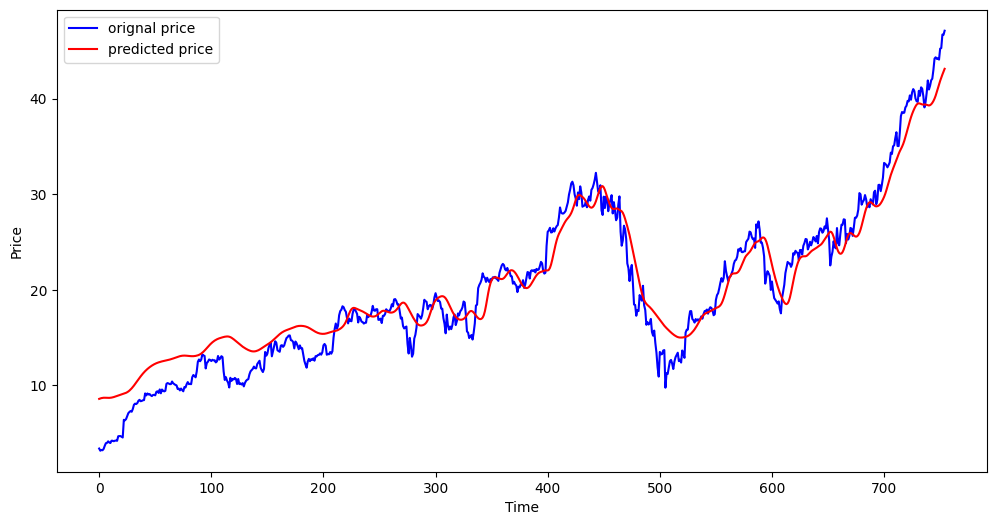

In [62]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'orignal price')
plt.plot(y_predicted, 'r', label = 'predicted price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()